In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate
import scipy.interpolate
import numpy as np
import scipy.stats as sts
import seaborn as sns

import test_TOVsolver
import EOS_extension

n0 = 0.16 #MeV/fm^3
pi = np.pi
MeV_to_km = 1.323e-6
max_p = 350 #MeV/fm^3

In [6]:
EOS_small = pd.read_table('../data/EOSCEFTVE1.dat', header=None).to_numpy()
print(EOS_small.shape)

(1650, 3)


In [4]:
nsamp = 5

EOS_test_cs, EOS_test_lin, EOS_test_poly, causality = EOS_extension.extend(EOS_small, nsamp)

MRL_test_cs = test_TOVsolver.solve(EOS_test_cs, max_p)
MRL_test_lin = test_TOVsolver.solve(EOS_test_lin, max_p)
MRL_test_poly = test_TOVsolver.solve(EOS_test_poly, max_p)

C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:76: RuntimeWarning: invalid value encountered in sqrt
  num0 = -2 * y[0] * (np.sqrt(y[0]) - 2 * y[1])
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:77: RuntimeWarning: invalid value encountered in power
  den0 = (EOS_e(p) + p) * (y[1] + 4 * pi * p * y[0] ** (3 / 2))
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:81: RuntimeWarning: invalid value encountered in power
  num1 = -4 * np.pi * EOS_e(p) * (y[0] ** (3 / 2)) * (np.sqrt(y[0]) - 2 * y[1])
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:81: RuntimeWarning: invalid value encountered in sqrt
  num1 = -4 * np.pi * EOS_e(p) * (y[0] ** (3 / 2)) * (np.sqrt(y[0]) - 2 * y[1])
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:82: RuntimeWarning: invalid value encountered in power
  den1 = (EOS_e(p) + p) * (y[1] + 4 * pi * p * y[0] ** (3 / 

0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.


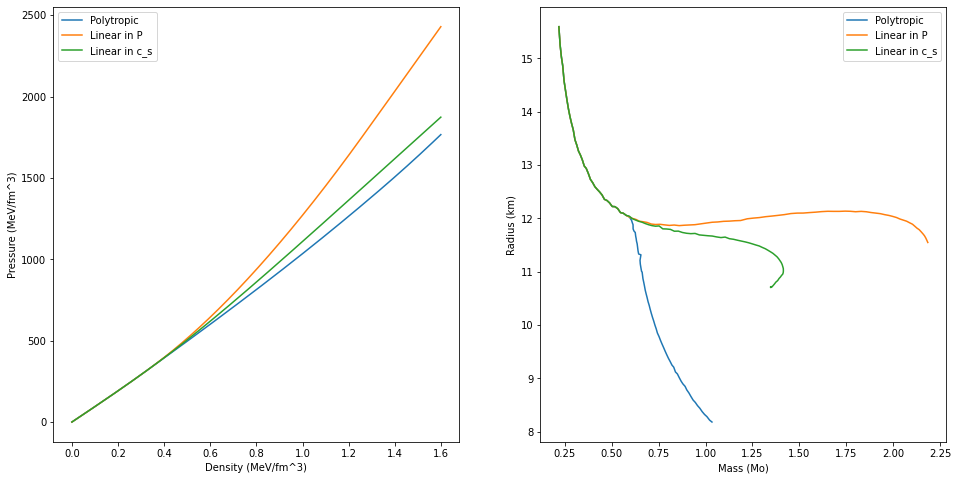

In [5]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].plot(EOS_test_poly[:,0], EOS_test_poly[:,2], label='Polytropic')
ax[0].plot(EOS_test_lin[:,0], EOS_test_lin[:,2], label='Linear in P')
ax[0].plot(EOS_test_cs[:,0], EOS_test_cs[:,2], label='Linear in c_s')
ax[0].set_xlabel('Density (MeV/fm^3)')
ax[0].set_ylabel('Pressure (MeV/fm^3)')
ax[0].legend()

ax[1].plot(MRL_test_poly[:,0], MRL_test_poly[:,1], label='Polytropic')
ax[1].plot(MRL_test_lin[:,0], MRL_test_lin[:,1], label='Linear in P')
ax[1].plot(MRL_test_cs[:,0], MRL_test_cs[:,1], label='Linear in c_s')
ax[1].set_xlabel('Mass (Mo)')
ax[1].set_ylabel('Radius (km)')
ax[1].legend()

In [7]:
size = 5*EOS_small.shape[0]

EOS_test2_cs, EOS_test2_lin, EOS_test2_poly, causality = EOS_extension.extend(EOS_small, nsamp, size=size)
print(str(causality))

MRL_test2_cs = test_TOVsolver.solve(EOS_test2_cs, max_p)
MRL_test2_lin = test_TOVsolver.solve(EOS_test2_lin, max_p)
MRL_test2_poly = test_TOVsolver.solve(EOS_test2_poly, max_p)

True


C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:76: RuntimeWarning: invalid value encountered in sqrt
  num0 = -2 * y[0] * (np.sqrt(y[0]) - 2 * y[1])
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:77: RuntimeWarning: invalid value encountered in power
  den0 = (EOS_e(p) + p) * (y[1] + 4 * pi * p * y[0] ** (3 / 2))
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:81: RuntimeWarning: invalid value encountered in power
  num1 = -4 * np.pi * EOS_e(p) * (y[0] ** (3 / 2)) * (np.sqrt(y[0]) - 2 * y[1])
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:81: RuntimeWarning: invalid value encountered in sqrt
  num1 = -4 * np.pi * EOS_e(p) * (y[0] ** (3 / 2)) * (np.sqrt(y[0]) - 2 * y[1])
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:82: RuntimeWarning: invalid value encountered in power
  den1 = (EOS_e(p) + p) * (y[1] + 4 * pi * p * y[0] ** (3 / 

0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.


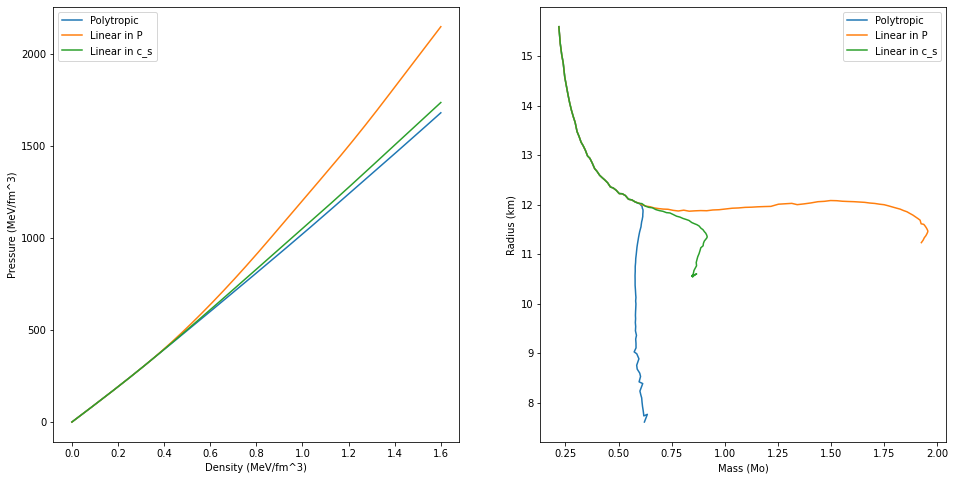

In [8]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].plot(EOS_test2_poly[:,0], EOS_test2_poly[:,2], label='Polytropic')
ax[0].plot(EOS_test2_lin[:,0], EOS_test2_lin[:,2], label='Linear in P')
ax[0].plot(EOS_test2_cs[:,0], EOS_test2_cs[:,2], label='Linear in c_s')
ax[0].set_xlabel('Density (MeV/fm^3)')
ax[0].set_ylabel('Pressure (MeV/fm^3)')
ax[0].legend()

ax[1].plot(MRL_test_poly[:,0], MRL_test_poly[:,1], label='Polytropic')
ax[1].plot(MRL_test_lin[:,0], MRL_test_lin[:,1], label='Linear in P')
ax[1].plot(MRL_test_cs[:,0], MRL_test_cs[:,1], label='Linear in c_s')
ax[1].set_xlabel('Mass (Mo)')
ax[1].set_ylabel('Radius (km)')
ax[1].legend()

In [10]:
nsim = 1000
size_ex = 5*EOS_small.shape[0]
size = size_ex + EOS_small.shape[0] -1

EOS_cs_1k = np.zeros((size, 3, nsim))

for i in range(nsim):
    EOS_cs_1k[:,:,i] =  EOS_extension.extend(EOS_small, nsamp, size=size_ex, ext_type='cs')

In [12]:
size_MRL = 80
MRL_cs_1k = np.zeros((size_MRL, 3, nsim))

for i in range(nsim):
    MRL_cs_1k[:,:,i] = test_TOVsolver.solve(EOS_cs_1k[:,:,i], max_p, size=size_MRL)

C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:76: RuntimeWarning: invalid value encountered in sqrt
  num0 = -2 * y[0] * (np.sqrt(y[0]) - 2 * y[1])
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:77: RuntimeWarning: invalid value encountered in power
  den0 = (EOS_e(p) + p) * (y[1] + 4 * pi * p * y[0] ** (3 / 2))
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:81: RuntimeWarning: invalid value encountered in power
  num1 = -4 * np.pi * EOS_e(p) * (y[0] ** (3 / 2)) * (np.sqrt(y[0]) - 2 * y[1])
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:81: RuntimeWarning: invalid value encountered in sqrt
  num1 = -4 * np.pi * EOS_e(p) * (y[0] ** (3 / 2)) * (np.sqrt(y[0]) - 2 * y[1])
C:\Users\brend\OneDrive\LANL Project\LANL_project\test_stuff\test_TOVsolver.py:82: RuntimeWarning: invalid value encountered in power
  den1 = (EOS_e(p) + p) * (y[1] + 4 * pi * p * y[0] ** (3 / 

0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted f

0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted f

0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted f

0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted f

0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted f

0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted f

0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted f

0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted from table due to the solver failing.
0 entries were deleted f

In [36]:
np.savetxt("../data/MRL1ksim_cs_M.dat", MRL_cs_1k[:,0,:])
np.savetxt("../data/MRL1ksim_cs_R.dat", MRL_cs_1k[:,1,:])
np.savetxt("../data/MRL1ksim_cs_L.dat", MRL_cs_1k[:,2,:])

(array([130.,   0.,   0.,   0.,   0.,   0.,   6.,  80., 138., 646.]),
 array([ 0.        ,  1.20898487,  2.41796975,  3.62695462,  4.8359395 ,
         6.04492437,  7.25390924,  8.46289412,  9.67187899, 10.88086387,
        12.08984874]),
 <a list of 10 Patch objects>)

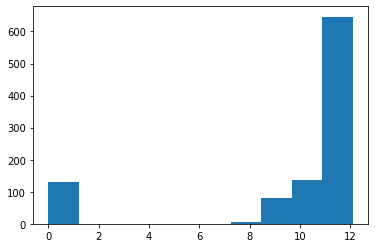

In [15]:
m_line = 1.10 #solar masses
m_tol = 0.05

MRL_slices = np.zeros((3,nsim))

for i in range(nsim):
    for j in range(size_MRL):
        if MRL_cs_1k[j,0,i] > m_line - m_tol and MRL_cs_1k[j,0,i] < m_line + m_tol:
            MRL_slices[:,i] = MRL_cs_1k[j,:,i]

plt.hist(MRL_slices[0,:])

In [60]:
def clean_MRL(MRL_table):
    """
    function to remove all (0,0,0) points from the MRL table when the solver fails
    """

    bool_array = MRL_table[0,:] != 0
    clean_MRL = MRL_table[:,bool_array];
    
    numdel = MRL_table.shape[0] - bool_array.shape[0];
    
    return clean_MRL, numdel

(array([ 16.,   4.,   4.,   2.,   4.,  14.,  69., 171., 267., 319.]),
 array([1.05019907, 1.06017726, 1.07015544, 1.08013363, 1.09011182,
        1.10009001, 1.1100682 , 1.12004639, 1.13002458, 1.14000276,
        1.14998095]),
 <a list of 10 Patch objects>)

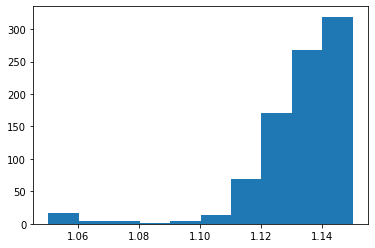

In [19]:
clean_slices, numdel = clean_MRL(MRL_slices)

plt.hist(clean_slices[0,:])

In [61]:
def histo_at_m(MRL_table, mass_line, m_tol = 0.05):
    
    MRL_slices = np.zeros((3,nsim))

    for i in range(nsim):
        for j in range(size_MRL):
            if MRL_cs_1k[j,0,i] > m_line - m_tol and MRL_cs_1k[j,0,i] < m_line + m_tol:
                MRL_slices[:,i] = MRL_cs_1k[j,:,i];

    clean_slices, numdel = clean_MRL(MRL_slices);

    plt.hist(clean_slices[1,:], bins=30, density=True)
    plt.xlabel("Radius (km)")
    plt.ylabel("Density")
    
    return clean_slices

array([[1.09299872e+00, 1.09877633e+00, 1.09669587e+00, ...,
        1.10020646e+00, 1.10513806e+00, 1.10410798e+00],
       [1.03414809e+01, 1.17676910e+01, 1.09750440e+01, ...,
        1.14691968e+01, 1.10593149e+01, 1.14078548e+01],
       [5.05729490e+02, 1.35501870e+03, 7.66981065e+02, ...,
        1.08717947e+03, 7.76285366e+02, 1.00780677e+03]])

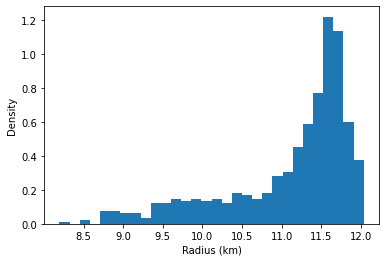

In [63]:
histo_at_m(MRL_cs_1k, 1.8, m_tol=0.01)